# Fake News Detection using Machine Learning and Deep Learning

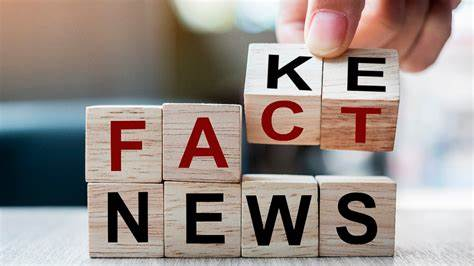

#### Importing the neccssary Libraries and Loading the Dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score,auc, classification_report, RocCurveDisplay
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [2]:
news_df = pd.read_csv('feverous.csv', names=["ID", "label", "claim", "evidence", "annotator_operations", "expected_challenge", "challenge"])

In [3]:
news_df = news_df.drop(0)

In [4]:
news_df['label'] = news_df['label'].replace({
    'NOT ENOUGH INFO': 0,
    'REFUTES': 0,
    'SUPPORTS': 1,
})

In [5]:
news_df.head()

,ID,label,claim,evidence,annotator_operations,expected_challenge,challenge
1,24435.0,0,Michael Folivi competed with ten teams from 20...,"[{'content': ['Michael Folivi_cell_1_2_0', 'Mi...","[{'operation': 'start', 'value': 'start', 'tim...",NaN,Numerical Reasoning
2,14802.0,1,Asiatic Society of Bangladesh(housed in Nimtal...,[{'content': ['Asiatic Society of Bangladesh_s...,"[{'operation': 'start', 'value': 'start', 'tim...",NaN,Other
3,28540.0,1,"Lindfield railway station has 3 bus routes, in...",[{'content': ['Lindfield railway station_sente...,"[{'operation': 'start', 'value': 'start', 'tim...",NaN,Other
4,71874.0,1,Mukaradeeb('Wolf's Den') is a city in Iraq nea...,"[{'content': ['Mukaradeeb_sentence_1', 'Mukara...","[{'operation': 'start', 'value': 'start', 'tim...",NaN,Combining Tables and Text
5,70296.0,1,Herbivore men was coined by Maki Fukasawa and ...,"[{'content': ['Herbivore men_sentence_1', 'Her...","[{'operation': 'start', 'value': 'start', 'tim...",NaN,Multi-hop Reasoning


In [6]:
news_df.shape

(71291, 7)

<AxesSubplot:xlabel='label', ylabel='count'>

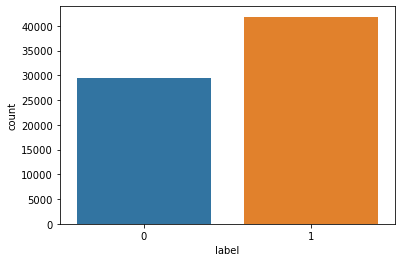

In [7]:
sns.countplot(x='label', data=news_df)

#### Data-Preprocessing

In [8]:
news_df.isna().sum()

ID                          0
label                       0
claim                       0
evidence                    0
annotator_operations        0
expected_challenge      71291
challenge                   0
dtype: int64

In [9]:
news_df = news_df.fillna(' ')

In [10]:
news_df.isna().sum()

ID                      0
label                   0
claim                   0
evidence                0
annotator_operations    0
expected_challenge      0
challenge               0
dtype: int64

In [11]:
news_df['content'] = news_df['claim']

In [12]:
news_df

,ID,label,claim,evidence,annotator_operations,expected_challenge,challenge,content
1,24435.0,0,Michael Folivi competed with ten teams from 20...,"[{'content': ['Michael Folivi_cell_1_2_0', 'Mi...","[{'operation': 'start', 'value': 'start', 'tim...",,Numerical Reasoning,Michael Folivi competed with ten teams from 20...
2,14802.0,1,Asiatic Society of Bangladesh(housed in Nimtal...,[{'content': ['Asiatic Society of Bangladesh_s...,"[{'operation': 'start', 'value': 'start', 'tim...",,Other,Asiatic Society of Bangladesh(housed in Nimtal...
3,28540.0,1,"Lindfield railway station has 3 bus routes, in...",[{'content': ['Lindfield railway station_sente...,"[{'operation': 'start', 'value': 'start', 'tim...",,Other,"Lindfield railway station has 3 bus routes, in..."
4,71874.0,1,Mukaradeeb('Wolf's Den') is a city in Iraq nea...,"[{'content': ['Mukaradeeb_sentence_1', 'Mukara...","[{'operation': 'start', 'value': 'start', 'tim...",,Combining Tables and Text,Mukaradeeb('Wolf's Den') is a city in Iraq nea...
5,70296.0,1,Herbivore men was coined by Maki Fukasawa and ...,"[{'content': ['Herbivore men_sentence_1', 'Her...","[{'operation': 'start', 'value': 'start', 'tim...",,Multi-hop Reasoning,Herbivore men was coined by Maki Fukasawa and ...
...,...,...,...,...,...,...,...,...
71287,40197.0,1,"Monica Frassoni, European Green Party Spokespe...","[{'content': ['Monica Frassoni_cell_0_5_1'], '...","[{'operation': 'start', 'value': 'start', 'tim...",,Other,"Monica Frassoni, European Green Party Spokespe..."
71288,28692.0,1,"Emil Roy was a native of Brighton, Massachuset...","[{'content': ['Emil Roy_sentence_3', 'Emil Roy...","[{'operation': 'start', 'value': 'start', 'tim...",,Other,"Emil Roy was a native of Brighton, Massachuset..."
71289,43014.0,0,Francisco Antonio Zea began studying in Medell...,[{'content': ['Francisco Antonio Zea_sentence_...,"[{'operation': 'start', 'value': 'start', 'tim...",,Other,Francisco Antonio Zea began studying in Medell...
71290,22198.0,1,"Vernors, originally sold as Vernor’s, moved it...","[{'content': ['Vernors_sentence_11', 'Vernors_...","[{'operation': 'start', 'value': 'start', 'tim...",,Other,"Vernors, originally sold as Vernor’s, moved it..."


In [13]:
news_df['content']

1        Michael Folivi competed with ten teams from 20...
2        Asiatic Society of Bangladesh(housed in Nimtal...
3        Lindfield railway station has 3 bus routes, in...
4        Mukaradeeb('Wolf's Den') is a city in Iraq nea...
5        Herbivore men was coined by Maki Fukasawa and ...
                               ...                        
71287    Monica Frassoni, European Green Party Spokespe...
71288    Emil Roy was a native of Brighton, Massachuset...
71289    Francisco Antonio Zea began studying in Medell...
71290    Vernors, originally sold as Vernor’s, moved it...
71291    Convergenza per il Friuli, a strong supporter ...
Name: content, Length: 71291, dtype: object

##### Performing Stemming
When Stemming is applied to the words in the corpus the word gives the base for that particular word. It is like from a tree with branches you are removing the branches till their stem.

In [14]:

ps = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [15]:
news_df['content'] = news_df['content'].apply(stemming)

In [16]:
news_df['content']

1        michael folivi compet ten team appear game mak...
2        asiat societi bangladesh hous nimtali non poli...
3        lindfield railway station bu rout first platfo...
4        mukaradeeb wolf den citi iraq near syrian bord...
5        herbivor men coin maki fukasawa neg connot you...
                               ...                        
71287    monica frassoni european green parti spokesper...
71288    emil roy nativ brighton massachusett play summ...
71289    francisco antonio zea began studi medellin dro...
71290    vernor origin sold vernor move bottl plant hea...
71291    convergenza per il friuli strong support friul...
Name: content, Length: 71291, dtype: object

In [17]:
X = news_df['content'].values
y = news_df['label'].values

In [18]:
print(X)

['michael folivi compet ten team appear game make seven goal total'
 'asiat societi bangladesh hous nimtali non polit organ renam ahm hasan dani play import role found'
 'lindfield railway station bu rout first platform servic rout emu plain via central richmond hornbi via strathfield'
 ... 'francisco antonio zea began studi medellin drop later'
 'vernor origin sold vernor move bottl plant headquart new locat due construct cobo hall'
 'convergenza per il friuli strong support friuli autonomi teach friulian languag region green centrist polit parti head udin mayor sergio cecotti']


##### Applying Tf-Idf Vectorization 
Term frequency–inverse document frequency, is a technique for text vectorization based on the Bag of words (BoW) model. It is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

In [19]:
vector = TfidfVectorizer()
vector.fit(X)
X = vector.transform(X)

In [20]:
print(X)

  (0, 52059)	0.22800277679670436
  (0, 50868)	0.2634945905563091
  (0, 50677)	0.19587377422395605
  (0, 46235)	0.27663373823167486
  (0, 32970)	0.31701864946402897
  (0, 30985)	0.30245277799070336
  (0, 19656)	0.2514092838024555
  (0, 18606)	0.22440188348320111
  (0, 17711)	0.5665365555202247
  (0, 10707)	0.2874529159058384
  (0, 2506)	0.23357736629462783
  (1, 47774)	0.2201351706134059
  (1, 43874)	0.184901423795822
  (1, 43010)	0.26263094196689774
  (1, 40351)	0.194270253701964
  (1, 40103)	0.11913589046218642
  (1, 37519)	0.19275570595065675
  (1, 36245)	0.20772384291827276
  (1, 36014)	0.38999126706851445
  (1, 23713)	0.22881899302491315
  (1, 22843)	0.17644161502130193
  (1, 21405)	0.30558583308171694
  (1, 17910)	0.14081998738857598
  (1, 12290)	0.31535760063587664
  (1, 4317)	0.27867568768876144
  :	:
  (71289, 21000)	0.20051138991283873
  (71289, 14437)	0.19987826670255082
  (71289, 10970)	0.2034779881367884
  (71289, 10370)	0.3419909264218115
  (71289, 6561)	0.2791925263803206

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [22]:
X_train.shape

(57032, 57885)

In [23]:
X_test.shape

(14259, 57885)

### Machine Learning Algorithms

#### Logistic Regression (LR)

Confusion Matrix:
 [[1853 4039]
 [1279 7088]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.31      0.41      5892
           1       0.64      0.85      0.73      8367

    accuracy                           0.63     14259
   macro avg       0.61      0.58      0.57     14259
weighted avg       0.62      0.63      0.60     14259

Accuracy: 0.6270425696051617
Precision: 0.6370090770198616
Recall: 0.8471375642404685
F1-Score: 0.7271981122396636


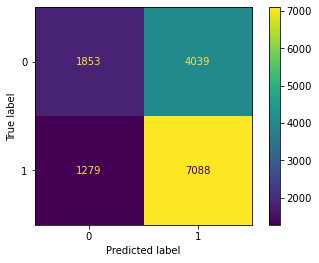

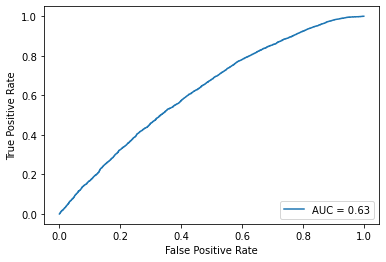

In [24]:
model = LogisticRegression(solver='saga', max_iter=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
TN, FP, FN, TP = confusion_mat.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
y_prob = model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob) 
print('Confusion Matrix:\n', confusion_mat)
print("\nClassification Report:\n", report)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
confusion_mat_display = ConfusionMatrixDisplay(confusion_mat).plot()
roc_curve_display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()

#### Support Vector Machine (SVM)

Confusion Matrix:
 [[2012 3880]
 [1397 6970]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.34      0.43      5892
           1       0.64      0.83      0.73      8367

    accuracy                           0.63     14259
   macro avg       0.62      0.59      0.58     14259
weighted avg       0.62      0.63      0.60     14259

Accuracy: 0.6299179465600673
Precision: 0.6423963133640553
Recall: 0.8330345404565556
F1-Score: 0.7253993859603476


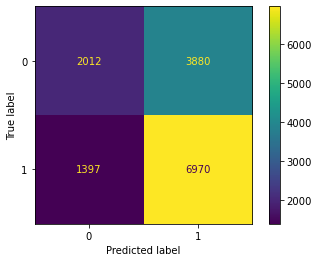

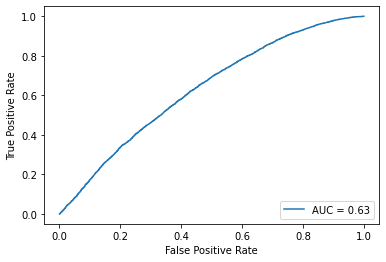

In [25]:
svm_model = OneVsRestClassifier(SVC(kernel='linear'))
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
TN, FP, FN, TP = confusion_mat.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
y_prob = svm_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob) 
print('Confusion Matrix:\n', confusion_mat)
print("\nClassification Report:\n", report)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
confusion_mat_display = ConfusionMatrixDisplay(confusion_mat).plot()
roc_curve_display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()

#### Naive Bayes Algorithms (NB)

Confusion Matrix:
 [[1106 4786]
 [ 761 7606]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.19      0.29      5892
           1       0.61      0.91      0.73      8367

    accuracy                           0.61     14259
   macro avg       0.60      0.55      0.51     14259
weighted avg       0.60      0.61      0.55     14259

Accuracy: 0.6109825373448349
Precision: 0.6137830858618464
Recall: 0.9090474483088323
F1-Score: 0.7327905968495593


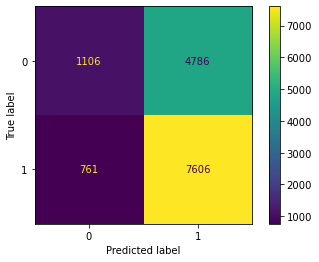

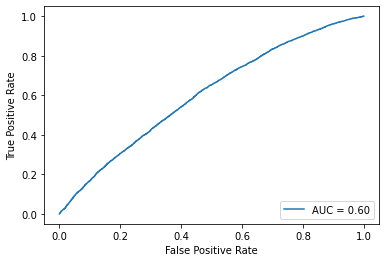

In [26]:
NB = MultinomialNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
TN, FP, FN, TP = confusion_mat.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
y_prob = NB.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr) 
print('Confusion Matrix:\n', confusion_mat)
print("\nClassification Report:\n", report)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
confusion_mat_display = ConfusionMatrixDisplay(confusion_mat).plot()
roc_curve_display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()

#### Decision Tree (DT)

Confusion Matrix:
 [[ 482 5410]
 [ 182 8185]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.08      0.15      5892
           1       0.60      0.98      0.75      8367

    accuracy                           0.61     14259
   macro avg       0.66      0.53      0.45     14259
weighted avg       0.65      0.61      0.50     14259

Accuracy: 0.6078266358089628
Precision: 0.6020595807282089
Recall: 0.9782478785705748
F1-Score: 0.7453783808396319


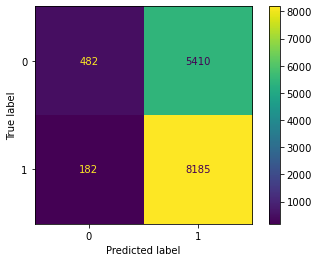

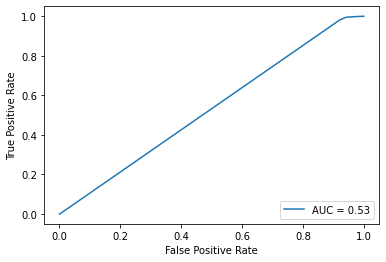

In [27]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
TN, FP, FN, TP = confusion_mat.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
y_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
print('Confusion Matrix:\n', confusion_mat)
print("\nClassification Report:\n", report)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
confusion_mat_display = ConfusionMatrixDisplay(confusion_mat).plot()
roc_curve_display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()

#### Random Forest (RF)

Confusion Matrix:
 [[2548 3344]
 [2546 5821]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.43      0.46      5892
           1       0.64      0.70      0.66      8367

    accuracy                           0.59     14259
   macro avg       0.57      0.56      0.56     14259
weighted avg       0.58      0.59      0.58     14259

Accuracy: 0.5869275545269654
Precision: 0.6351336606655755
Recall: 0.6957093342894706
F1-Score: 0.6640428929956651


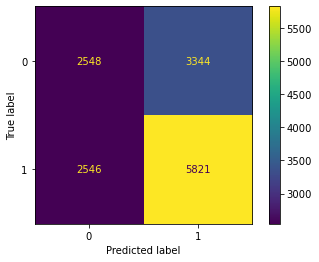

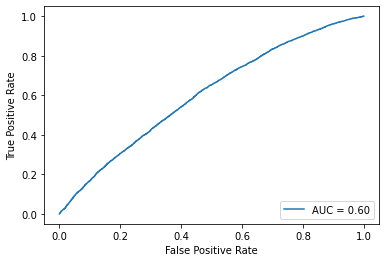

In [28]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='entropy', random_state=42, class_weight='balanced', bootstrap=True)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
TN, FP, FN, TP = confusion_mat.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
y_prob = NB.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
print('Confusion Matrix:\n', confusion_mat)
print("\nClassification Report:\n", report)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
confusion_mat_display = ConfusionMatrixDisplay(confusion_mat).plot()
roc_curve_display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()

#### Passive Aggressive Algorithm

Confusion Matrix:
 [[3030 2862]
 [2626 5741]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.51      0.52      5892
           1       0.67      0.69      0.68      8367

    accuracy                           0.62     14259
   macro avg       0.60      0.60      0.60     14259
weighted avg       0.61      0.62      0.61     14259

Accuracy: 0.6151202749140894
Precision: 0.6673253516215274
Recall: 0.6861479622325803
F1-Score: 0.6766057748968768


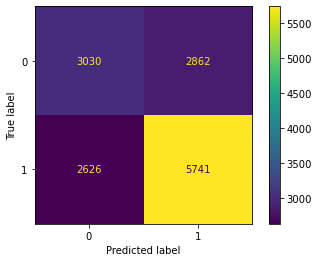

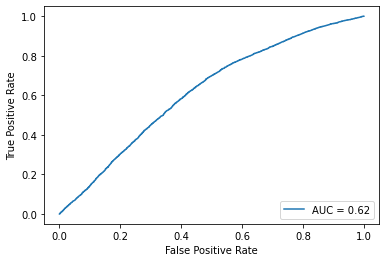

In [29]:
clf = PassiveAggressiveClassifier(max_iter=500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
TN, FP, FN, TP = confusion_mat.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
y_prob = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob) 
print('Confusion Matrix:\n', confusion_mat)
print("\nClassification Report:\n", report)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
confusion_mat_display = ConfusionMatrixDisplay(confusion_mat).plot()
roc_curve_display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()